## Projeto de Regressão
## Regressão para estimar os preços de casas nos EUA

##### 0.1 Importando Bibliotecas

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from scipy.stats import shapiro

#### Análise Exploratória e Descritiva

#### 0.2 Carregando e Visualizando os dados

In [2]:
dados = pd.read_csv('kc_house_data.csv')

In [3]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 0.3 Estrutura dos dados (Colunas ou Variáveis)

In [4]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#Números de Linhas x Colunas
dados.shape

(21613, 21)

#### 0.4 Visualizar a distribuição das variáveis numéricas

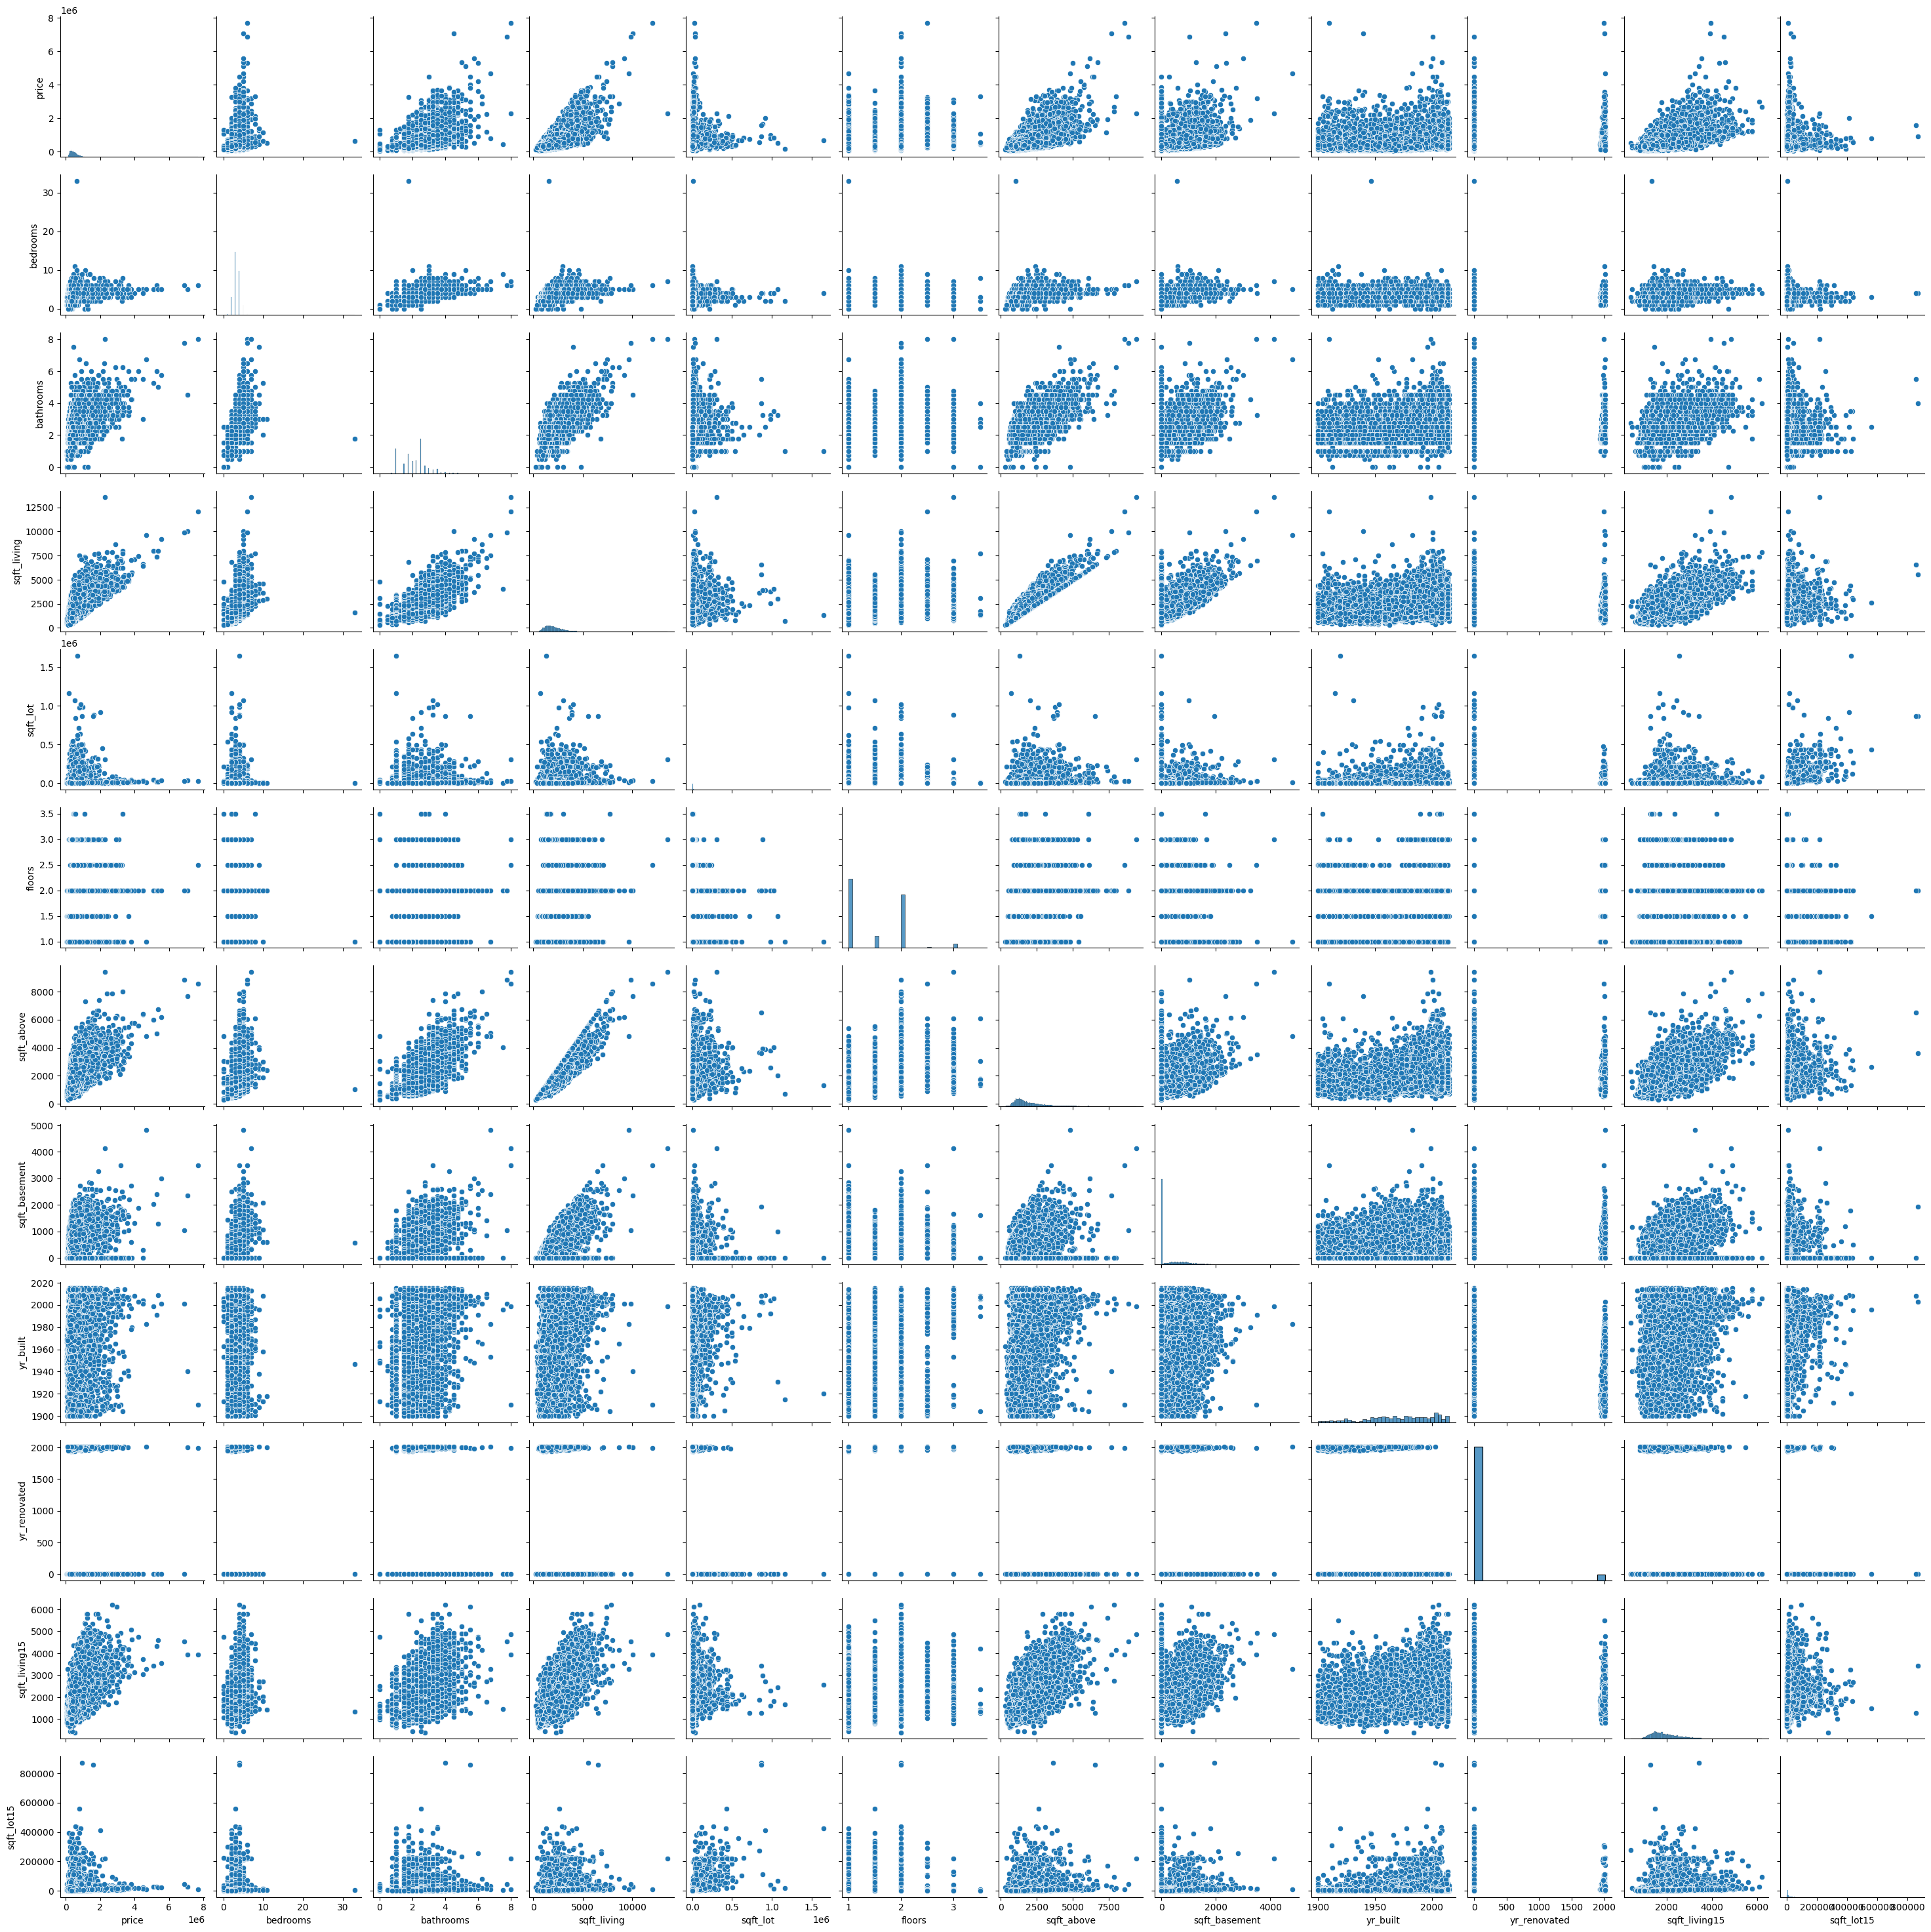

In [6]:
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
sns.pairplot(dados[numeric_features])
plt.show()

Observamos que o preço tem uma relação com o numero de quartos, banheiros, area construida, area habitavel e entre outras variaveis.

#### 0.5 Estatísticas descritivas

In [7]:
print(dados.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

#### 0.6 Explorar relações entre variáveis

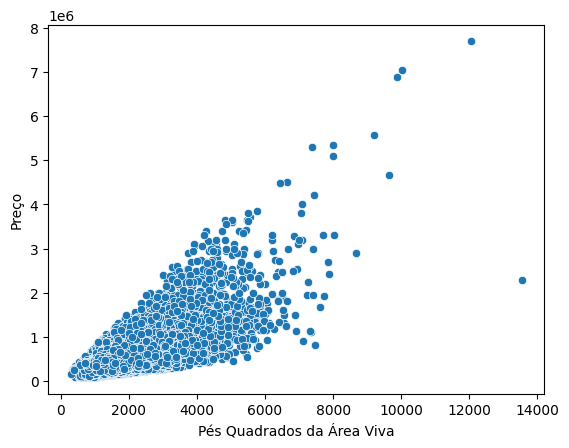

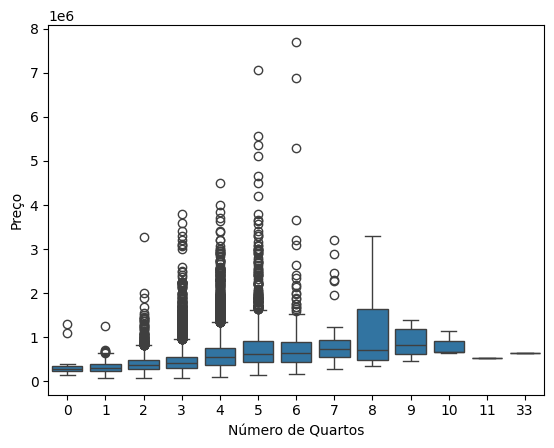

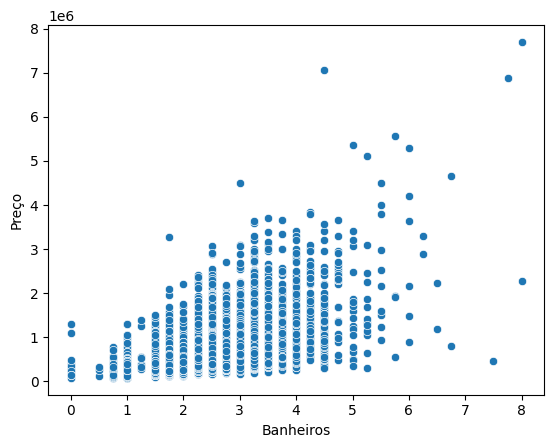

In [8]:
sns.scatterplot(x=dados['sqft_living'], y=dados['price'])
plt.xlabel('Pés Quadrados da Área Viva')
plt.ylabel('Preço')
plt.show()

sns.boxplot(x=dados['bedrooms'], y=dados['price'])
plt.xlabel('Número de Quartos')
plt.ylabel('Preço')
plt.show()

sns.scatterplot(x=dados['bathrooms'], y=dados['price'])
plt.xlabel('Banheiros')
plt.ylabel('Preço')
plt.show()

#### 0.7 Correlações entre as variáveis

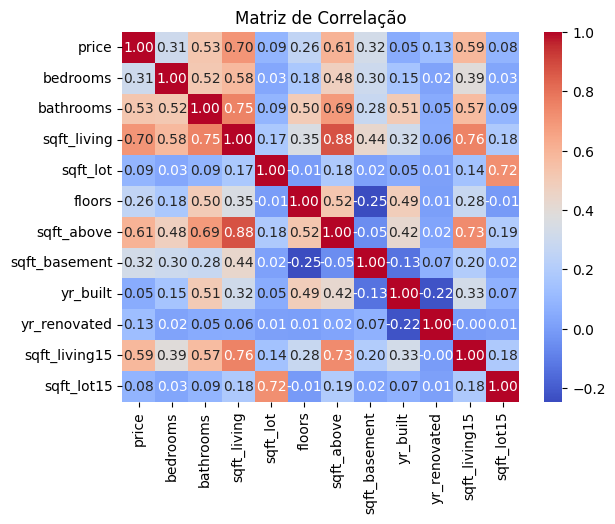

In [9]:
correlation_matrix = dados[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


#### 0.9 Range e Valores

#### 1.0 Análise de Range

In [10]:
for coluna in dados.columns:
    if dados[coluna].dtype != object:  # Verificar se a coluna é numérica
        min_valor = dados[coluna].min()
        max_valor = dados[coluna].max()
        amplitude = max_valor - min_valor
        print(f'Análise de Range para {coluna}:')
        print(f'Mínimo: {min_valor}, Máximo: {max_valor}, Amplitude: {amplitude}')


Análise de Range para id:
Mínimo: 1000102, Máximo: 9900000190, Amplitude: 9899000088
Análise de Range para price:
Mínimo: 75000.0, Máximo: 7700000.0, Amplitude: 7625000.0
Análise de Range para bedrooms:
Mínimo: 0, Máximo: 33, Amplitude: 33
Análise de Range para bathrooms:
Mínimo: 0.0, Máximo: 8.0, Amplitude: 8.0
Análise de Range para sqft_living:
Mínimo: 290, Máximo: 13540, Amplitude: 13250
Análise de Range para sqft_lot:
Mínimo: 520, Máximo: 1651359, Amplitude: 1650839
Análise de Range para floors:
Mínimo: 1.0, Máximo: 3.5, Amplitude: 2.5
Análise de Range para waterfront:
Mínimo: 0, Máximo: 1, Amplitude: 1
Análise de Range para view:
Mínimo: 0, Máximo: 4, Amplitude: 4
Análise de Range para condition:
Mínimo: 1, Máximo: 5, Amplitude: 4
Análise de Range para grade:
Mínimo: 1, Máximo: 13, Amplitude: 12
Análise de Range para sqft_above:
Mínimo: 290, Máximo: 9410, Amplitude: 9120
Análise de Range para sqft_basement:
Mínimo: 0, Máximo: 4820, Amplitude: 4820
Análise de Range para yr_built:
M

#### 1.2 (Valores) Análise de distribuição para 'price'

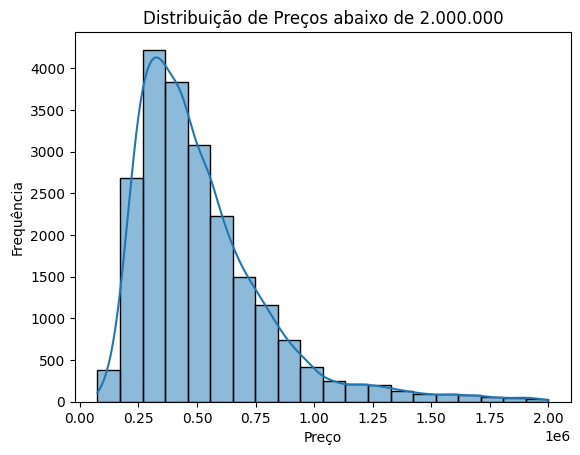

In [11]:
# Filtrando os dados com preço acima de 2.000.000
dados_abaixo_2milhoes = dados[dados['price'] < 2000000]

# Plotando o histograma
sns.histplot(dados_abaixo_2milhoes['price'], bins=20, kde=True)
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Distribuição de Preços abaixo de 2.000.000')
plt.show()

#### 1.2 (Valores) Boxplot para 'sqft_living'

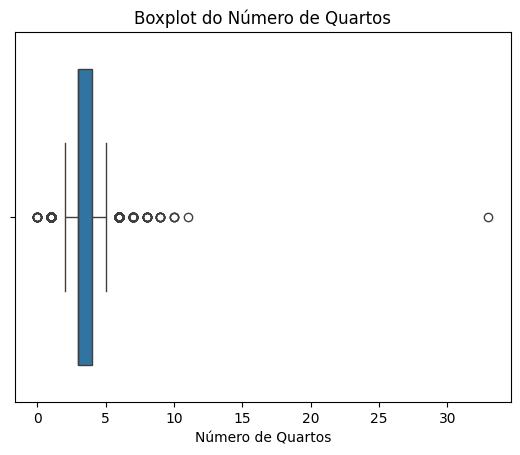

In [12]:
sns.boxplot(x=dados['bedrooms'])
plt.xlabel('Número de Quartos')
plt.title('Boxplot do Número de Quartos')
plt.show()

#### Análise Exploratória e Descritiva
#### 2.0 Relações

#### 2.1 (Visualizar as Relações) Exemplo de gráfico de dispersão entre 'sqft_living' (tamanho da casa) e 'price' (preço)

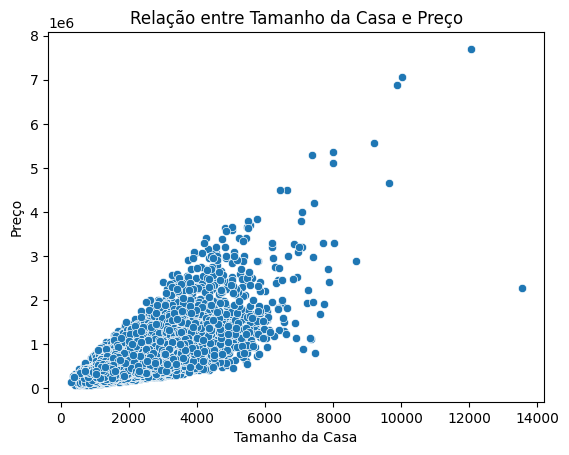

In [13]:
sns.scatterplot(x=dados['sqft_living'], y=dados['price'])
plt.xlabel('Tamanho da Casa')
plt.ylabel('Preço')
plt.title('Relação entre Tamanho da Casa e Preço')
plt.show()


#### 2.2 Calcular Correlações

In [14]:
# Selecionar apenas as colunas numéricas
dados_numericos = dados.select_dtypes(include=['float64', 'int64'])

# Calcular correlações
correlacoes = dados_numericos.corr()

# Exibir as correlações
print(correlacoes)


                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

#### 2.3 Mapa de calor das correlações

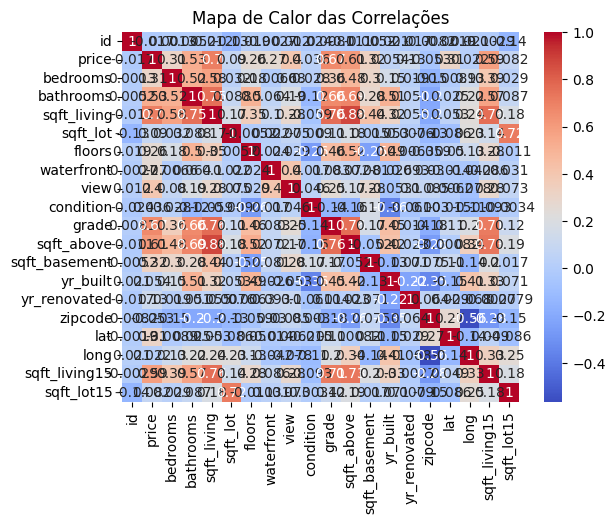

In [15]:
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()

#### Limpeza e Pré Processamento dos Dados
#### 3.0 Valores Nulls

In [16]:
# Identificando valores nulos
print(dados.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


#### 3.1 Valores Outliers

In [17]:
#Eliminando casas com 5 quartos ou mais
dados2 = dados.drop(dados[dados['bedrooms'] > 5].index)

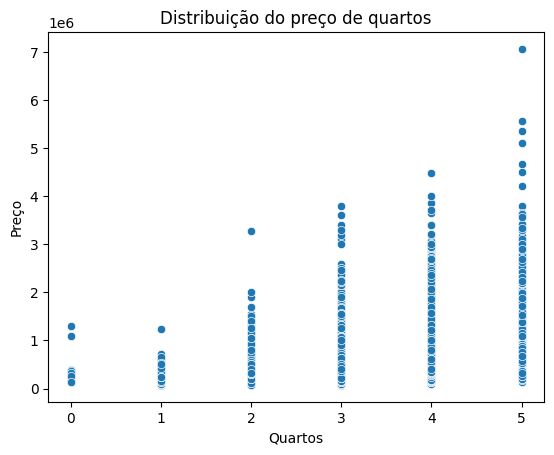

In [18]:
#Verificando quantidade de quarto 
sns.scatterplot(x=dados2['bedrooms'], y=dados2['price'])
plt.xlabel('Quartos')
plt.ylabel('Preço')
plt.title('Distribuição do preço de quartos')
plt.show()

In [19]:
#Eliminando casas com 5 banheiros ou menos
dados3 = dados2.drop(dados2[dados2['bathrooms'] > 5].index)

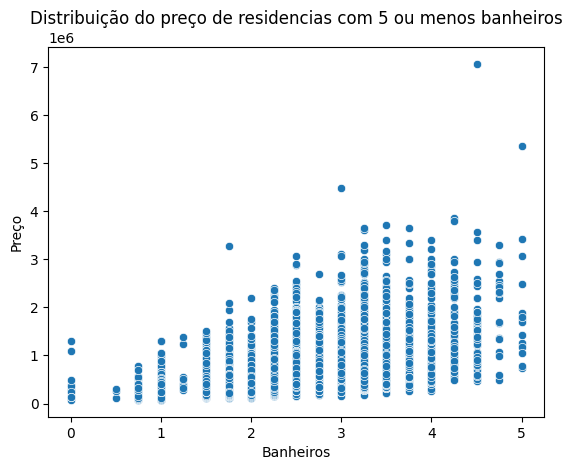

In [20]:
#Verificando quantidade de banheiros pós limpeza
sns.scatterplot(x=dados3['bathrooms'], y=dados3['price'])
plt.xlabel('Banheiros')
plt.ylabel('Preço')
plt.title('Distribuição do preço de residencias com 5 ou menos banheiros')
plt.show()

In [21]:
#Eliminando casas onde o sqft_living sejam maiores que 5000
dados4 = dados3.drop(dados3[dados3['sqft_living'] > 5000].index)

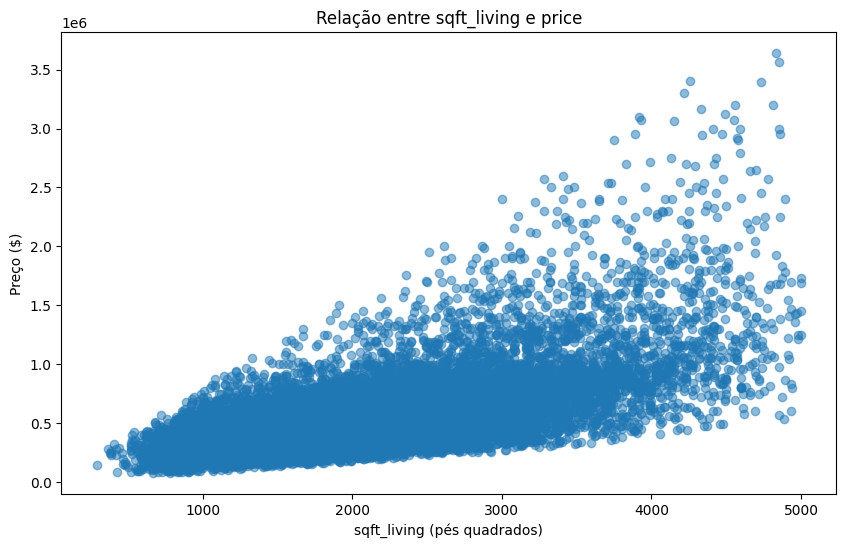

In [22]:
#Verificando quantidade de sqft_living pós limpeza
plt.figure(figsize=(10, 6))
plt.scatter(dados4['sqft_living'], dados4['price'], alpha=0.5)
plt.title('Relação entre sqft_living e price')
plt.xlabel('sqft_living (pés quadrados)')
plt.ylabel('Preço ($)')
plt.show()

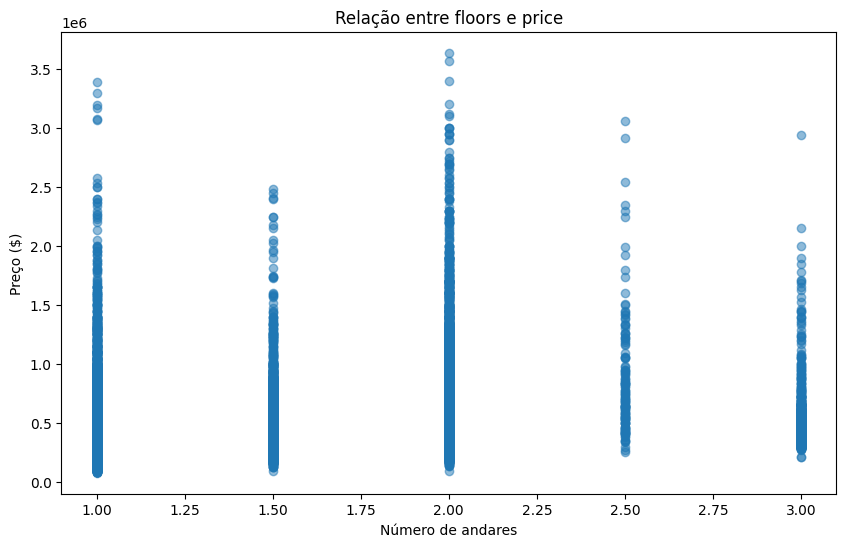

In [23]:
#Eliminando casas com mais de 3 andares 
dados5 = dados4.drop(dados4[dados4['floors'] > 3].index)

#Verificando número de andares pós limpeza
plt.figure(figsize=(10, 6))
plt.scatter(dados5['floors'], dados5['price'], alpha=0.5)
plt.title('Relação entre floors e price')
plt.xlabel('Número de andares')
plt.ylabel('Preço ($)')
plt.show()

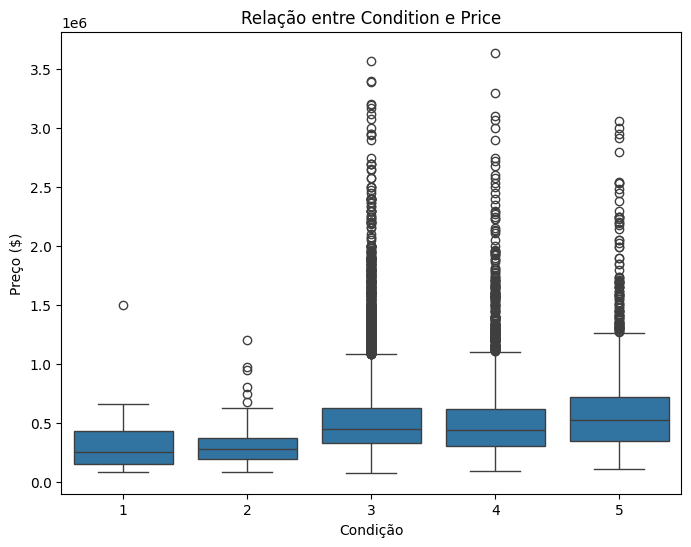

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='condition', y='price', data=dados5)
plt.xlabel('Condição')
plt.ylabel('Preço ($)')
plt.title('Relação entre Condition e Price')
plt.show()

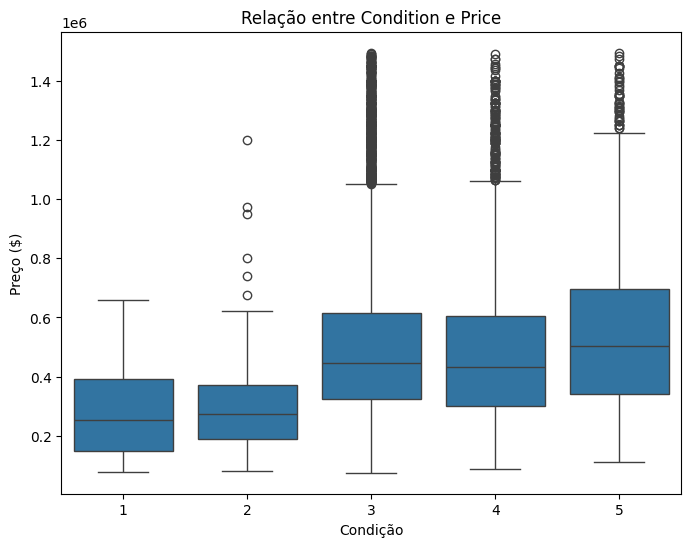

In [25]:
dados6 = dados5[dados5['price'] <1500000]

plt.figure(figsize=(8, 6))
sns.boxplot(x='condition', y='price', data=dados6)
plt.xlabel('Condição')
plt.ylabel('Preço ($)')
plt.title('Relação entre Condition e Price')
plt.show()

In [26]:
#Encontrando colunas constantes

def encontrar_colunas_constantes(dataframe):
    colunas_constantes = []
    for coluna in dataframe.columns:
        if dataframe[coluna].nunique() == 1:
            colunas_constantes.append(coluna)
    return colunas_constantes
encontrar_colunas_constantes(dados6)

[]

In [27]:
#Removendo Colunas 

dados7 = dados6.copy()
colunas_para_remover = ['waterfront', 'view', 'zipcode', 'lat', 'long']
dados7 = dados7.drop(columns=colunas_para_remover)

In [28]:
dados7

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,0,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,0,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,0,1410,1287


In [29]:
# Use o método value_counts() para contar os valores únicos na coluna 'yr_renovated'
contagem_valores = dados7['yr_renovated'].value_counts()

# Acesse a contagem de valores zerados (0) na coluna 'yr_renovated' se existirem
valores_zerados = contagem_valores.get(0, 0)

# Imprima a contagem de valores zerados
print("Número de valores zerados na coluna 'yr_renovated':", valores_zerados)

Número de valores zerados na coluna 'yr_renovated': 19903


In [30]:
dados8= dados7.copy()

# Converta a coluna 'date' para datetime
dados8['date'] = pd.to_datetime(dados8['date'], format='%Y%m%dT%H%M%S')

dados8['yr_renovated'] = dados8['yr_renovated'].replace(0, pd.NA)

# Crie uma nova coluna para armazenar a diferença entre os anos
dados8['diferenca_anos'] = dados8['date'].dt.year - dados8['yr_renovated']

dados8['diferenca_anos'].fillna(0, inplace=True)

# Exclua a coluna 'yr_renovated'
dados8.drop('yr_renovated', axis=1, inplace=True)

# Exiba o DataFrame após as alterações
dados8

C:\Users\Sávio\AppData\Local\Temp\ipykernel_7184\178686676.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados8['diferenca_anos'].fillna(0, inplace=True)
C:\Users\Sávio\AppData\Local\Temp\ipykernel_7184\178686676.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados8['diferenca_anos'].fillna(0, inpl

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,diferenca_anos
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1690,7639,23
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,1530,1509,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,1830,7200,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,1020,2007,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,1410,1287,0


In [31]:

# Calcule a idade da casa
dados8['idade_casa'] = dados8['date'].dt.year - dados8['yr_built']

# Exiba o DataFrame com a nova coluna 'idade_casa'
dados8

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,diferenca_anos,idade_casa
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,1340,5650,0,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1690,7639,23,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,2720,8062,0,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,1360,5000,0,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,1800,7503,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,1530,1509,0,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,1830,7200,0,1
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,1020,2007,0,5
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,1410,1287,0,11


In [32]:
dados8.drop(['date'], axis=1, inplace=True)

In [33]:
dados8

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,diferenca_anos,idade_casa
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,1340,5650,0,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1690,7639,23,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,2720,8062,0,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,1360,5000,0,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,1800,7503,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,1530,1509,0,5
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,1830,7200,0,1
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,1020,2007,0,5
21611,291310100,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,1410,1287,0,11


In [34]:
dados8.set_index('id', inplace=True)

In [35]:
dados8

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,diferenca_anos,idade_casa
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,1340,5650,0,59
6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1690,7639,23,63
5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,2720,8062,0,82
2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,1360,5000,0,49
1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,1800,7503,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,1530,1509,0,5
6600060120,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,1830,7200,0,1
1523300141,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,1020,2007,0,5


In [36]:
features = dados8.drop(columns=['price', 'yr_built'])  # Todas as colunas exceto 'price'
target = dados8['price']  # A coluna 'price'

In [37]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,diferenca_anos,idade_casa
id,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,3,7,1180,0,1340,5650,0,59
6414100192,3,2.25,2570,7242,2.0,3,7,2170,400,1690,7639,23,63
5631500400,2,1.00,770,10000,1.0,3,6,770,0,2720,8062,0,82
2487200875,4,3.00,1960,5000,1.0,5,7,1050,910,1360,5000,0,49
1954400510,3,2.00,1680,8080,1.0,3,8,1680,0,1800,7503,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,3,8,1530,0,1530,1509,0,5
6600060120,4,2.50,2310,5813,2.0,3,8,2310,0,1830,7200,0,1
1523300141,2,0.75,1020,1350,2.0,3,7,1020,0,1020,2007,0,5


In [38]:
target

id
7129300520    221900.0
6414100192    538000.0
5631500400    180000.0
2487200875    604000.0
1954400510    510000.0
                ...   
263000018     360000.0
6600060120    400000.0
1523300141    402101.0
291310100     400000.0
1523300157    325000.0
Name: price, Length: 20713, dtype: float64

#### Divisão dos Dados e Treinamento do Modelo
#### 4.0 Divisão em Treino e Teste

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(16570, 13)

In [41]:
X_test.shape

(4143, 13)

In [42]:
y_train.shape

(16570,)

In [43]:
y_test.shape

(4143,)

#### 4.1 Normalização e Codificação de Variáveis

In [44]:
# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar as variáveis do conjunto de treino
X_train_normalized = scaler.fit_transform(X_train)

# Usar as mesmas transformações para normalizar as variáveis do conjunto de teste
X_test_normalized = scaler.transform(X_test)

In [45]:
X_train_normalized

array([[0.6       , 0.45      , 0.30997877, ..., 0.01510627, 0.01234568,
        0.43103448],
       [0.6       , 0.45      , 0.41401274, ..., 0.01587775, 0.01234568,
        0.31034483],
       [0.6       , 0.35      , 0.50318471, ..., 0.00998096, 0.01234568,
        0.56034483],
       ...,
       [0.6       , 0.35      , 0.44585987, ..., 0.01607062, 0.01234568,
        0.48275862],
       [0.8       , 0.2       , 0.32484076, ..., 0.00848087, 0.01234568,
        0.79310345],
       [0.6       , 0.2       , 0.16348195, ..., 0.01584739, 0.01234568,
        0.42241379]])

#### 4.2 Treinamento e Avaliação dos Modelos de Regressão

In [46]:
# Treinar um modelo de regressão linear multivariada
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_normalized, y_train)

# Fazer previsões usando o modelo de regressão linear para o conjunto de teste
y_pred_linear = linear_reg_model.predict(X_test_normalized)

# Calcular métricas para avaliar o modelo de regressão linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Métricas do modelo de regressão linear:")
print("Mean Squared Error (MSE):", mse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print("R-squared (R2):", r2_linear)

Métricas do modelo de regressão linear:
Mean Squared Error (MSE): 23020101667.041992
Mean Absolute Error (MAE): 113668.5698105569
R-squared (R2): 0.5961242968726551


In [47]:
# Treinar um modelo de Random Forest para regressão
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_normalized, y_train)

# Fazer previsões usando o modelo de Random Forest para o conjunto de teste
y_pred_rf = random_forest_model.predict(X_test_normalized)

# Calcular métricas para avaliar o modelo de Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nMétricas do modelo de Random Forest:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2):", r2_rf)


Métricas do modelo de Random Forest:
Mean Squared Error (MSE): 17939925653.510292
Mean Absolute Error (MAE): 98172.17252925185
R-squared (R2): 0.6852533410946144


In [48]:
df_X_test_normalized = pd.DataFrame(X_test_normalized)
df_X_test_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.6,0.45,0.409766,0.006064,0.00,0.75,0.636364,0.299363,0.226087,0.389724,0.016721,0.012346,0.362069
1,0.8,0.55,0.479830,0.004311,0.00,0.50,0.636364,0.244161,0.482609,0.350770,0.013522,0.012346,0.250000
2,0.8,0.50,0.435244,0.004681,0.50,0.50,0.636364,0.435244,0.000000,0.322946,0.016630,0.012346,0.224138
3,0.8,0.40,0.299363,0.006983,0.50,0.50,0.545455,0.299363,0.000000,0.289557,0.012499,0.012346,0.224138
4,1.0,0.50,0.447983,0.002440,0.50,0.50,0.545455,0.447983,0.000000,0.334075,0.006811,0.012346,0.112069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,0.6,0.60,0.730361,0.231887,0.25,0.75,0.727273,0.411890,0.652174,0.285847,0.387790,0.012346,0.215517
4139,0.8,0.40,0.244161,0.002626,0.50,0.75,0.545455,0.244161,0.000000,0.167130,0.006124,0.012346,0.370690
4140,1.0,0.45,0.414013,0.005532,0.50,0.50,0.545455,0.414013,0.000000,0.330365,0.019632,0.012346,0.224138
4141,1.0,0.50,0.622081,0.006089,0.50,0.50,0.636364,0.622081,0.000000,0.462066,0.015071,0.012346,0.086207


In [49]:
y_pred_rf

array([714687.  , 449308.19, 449698.33, ..., 285681.  , 556878.54,
       833387.5 ])

In [50]:
y_test

id
4045800030    739000.0
8651520510    582800.0
8078440050    569500.0
2122059014    277500.0
7237300090    335000.0
                ...   
322069180     649500.0
9834201100    332500.0
5054800110    328000.0
7787920180    534950.0
7228500415    480000.0
Name: price, Length: 4143, dtype: float64

In [51]:
# Criar um objeto DMatrix para os dados de treino e teste
dtrain = xgb.DMatrix(X_train_normalized, label=y_train)
dtest = xgb.DMatrix(X_test_normalized, label=y_test)

# Definir os parâmetros do modelo XGBoost
params = {
    'objective': 'reg:squarederror',  # para problemas de regressão
    'eval_metric': 'rmse',  # métrica de avaliação: root mean squared error
    'learning_rate': 0.2,
    'n_estimators': 200
}

# Treinar o modelo XGBoost
num_rounds = 100  # número de iterações de treinamento
xgb_model = xgb.train(params, dtrain, num_rounds)

# Fazer previsões usando o modelo XGBoost para o conjunto de teste
y_pred_xgb = xgb_model.predict(dtest)

# Calcular métricas para avaliar o modelo XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Métricas do modelo XGBoost:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("R-squared (R2):", r2_xgb)

Métricas do modelo XGBoost:
Mean Squared Error (MSE): 18351269419.11236
Mean Absolute Error (MAE): 100339.2769505793
R-squared (R2): 0.678036528807576


C:\Users\Sávio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:160: UserWarning: [10:54:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


#### 4.3 Avaliação dos Resíduos

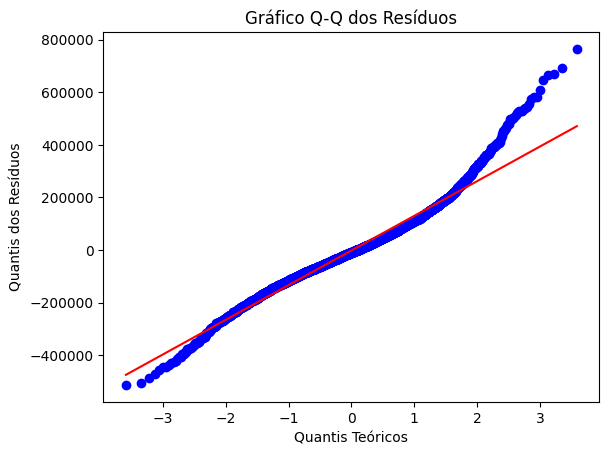

In [52]:
# Calcular os resíduos
residuos = y_test - y_pred_rf

# Gerar o gráfico Q-Q
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Resíduos')
plt.show()

In [53]:

# Realizar o teste de Shapiro-Wilk
stat, p_value = shapiro(residuos)

# Exibir os resultados
print("Estatística do teste de Shapiro-Wilk:", stat)
print("Valor-p:", p_value)

# Interpretar os resultados
alpha = 0.05
if p_value > alpha:
    print("Os resíduos parecem seguir uma distribuição normal (falha em rejeitar H0)")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeição de H0)")


Estatística do teste de Shapiro-Wilk: 0.9663325728392047
Valor-p: 4.4535405356616986e-30
Os resíduos não seguem uma distribuição normal (rejeição de H0)


#### 4.4 Salvando o Modelo Escolhido

In [54]:
with open('random_forest_model.pkl', 'wb') as arquivo:
    pickle.dump(random_forest_model, arquivo)

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


#### 5.0 Conclusão

##### Foram testados três modelos diferentes de regressão: o modelo de regressão linear, Random Forest e o XGBoost. Dos modelos testados, o que apresentou melhor desempenho para o nosso caso foi o Random Forest, com um R² de 0.68. Com este modelo, agora podemos prever o preço das casas com base em variáveis como número de quartos, banheiros, tamanho da casa, entre outras relevantes para o nosso cenário. O valor de R² poderia ser ainda maior se tivéssemos mais variáveis explicativas. Isso nos permitiria alcançar uma distribuição normal dos resíduos, garantindo a qualidade do modelo.